# Stack Overflow Analysis of WSL users 2022

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas
from matplotlib.ticker import PercentFormatter

In [3]:
sns.set_theme()
sns.set_context("paper")
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

In [4]:
df=pandas.read_csv('Data/survey_results_public.csv')

In [5]:
#Function for returning a dataframe with a particular column exploded based on a string separator

def col_expand(dataframe,colname,separator):
    df=dataframe.copy()
    df[colname]=df[colname].str.split(separator)
    df = df.explode(colname)
    return df

## Personal vs Professional use comparison

In [6]:
dfpro =col_expand(df,'OpSysProfessional use',';')
dfper =col_expand(df,'OpSysPersonal use',';')

use_df=dfpro['OpSysProfessional use'].value_counts().rename_axis('OpSys').reset_index(name='Professional')
per_df=dfper['OpSysPersonal use'].value_counts().rename_axis('OpSys').reset_index(name='Personal')
use_df=use_df.merge(per_df, how = 'left', on='OpSys')
use_df['Professional Percentage']=round(use_df['Professional']/len(df.index),2)
use_df['Personal Percentage']=round(use_df['Personal']/len(df.index),2)
use_df

,OpSys,Professional,Personal,Professional Percentage,Personal Percentage
0,Windows,34905,44567,0.48,0.61
1,Linux-based,28523,28765,0.39,0.39
2,macOS,23578,22217,0.32,0.30
3,Windows Subsystem for Linux (WSL),10252,10724,0.14,0.15
4,BSD,737,1054,0.01,0.01
5,Other (please specify):,284,349,0.00,0.00


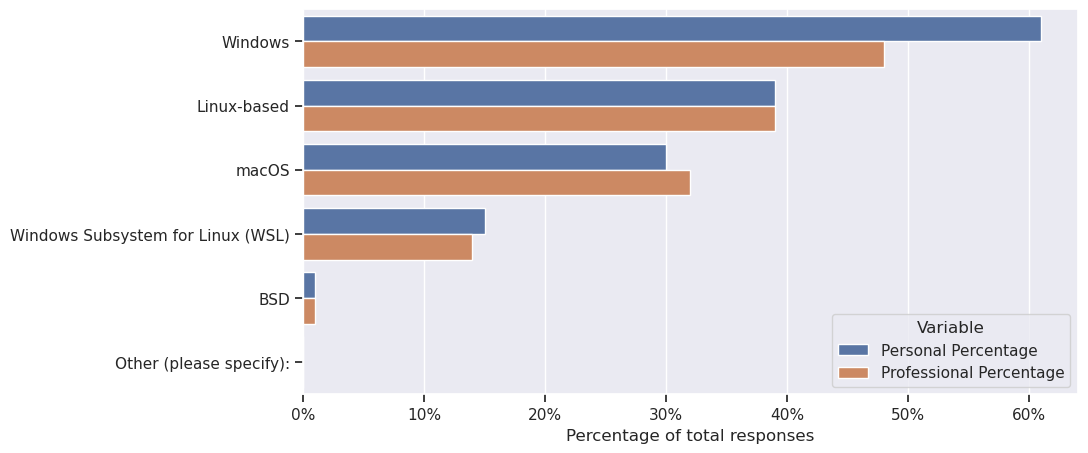

In [7]:
tidy_use=use_df[['OpSys','Personal Percentage','Professional Percentage']].melt(id_vars='OpSys').rename(columns=str.title)
fig, ax1 = plt.subplots(figsize=(10, 5))
chart = sns.barplot(y='Opsys', x='Value', hue='Variable', data=tidy_use, ax=ax1)
chart.axes.xaxis.set_major_formatter(PercentFormatter(1))
ax1.set_xlabel("Percentage of total responses")
ax1.set_ylabel("")
plt.show()

## WSL Professional Users by Job Role

In [8]:
#Create base table of WSL only answers
wsldf = dfpro[dfpro['OpSysProfessional use']=='Windows Subsystem for Linux (WSL)']


In [9]:
def wslcomparision(colname):
    expcol = col_expand(wsldf, colname,';')
    expcolsum= expcol[colname].value_counts().rename_axis(colname).reset_index(name='WSLCount')
    expcolsum['WSLpercent']=round(expcolsum['WSLCount']/len(wsldf.index),2)

    devalldf = col_expand(df,colname,';')
    devallsum =devalldf[colname].value_counts().rename_axis(colname).reset_index(name='AllCount')
    devallsum['ALLpercent']=round(devallsum['AllCount']/len(df.index),2)

    expcolsum = expcolsum.merge(devallsum, how = 'left', on=colname)
    expcolsum['WSLvAll']=round(expcolsum['WSLCount']/expcolsum['AllCount'],2)
    return expcolsum
   

In [17]:
def wslanswersbarpolot(colname,dataframe):
    fig, ax1 = plt.subplots(figsize=(10, 10))
    chart = sns.barplot(y=colname, x='WSLpercent', data=dataframe.sort_values(by='WSLpercent', ascending = False), color='SteelBlue', ax=ax1)
    chart.axes.xaxis.set_major_formatter(PercentFormatter(1))
    ax1.set_xlabel("Percentage of WSL user responses")
    ax1.set_ylabel("")
    return plt.show()

In [18]:
def wslcomparisionbarplot(colname,dataframe):
    fig, ax1 = plt.subplots(figsize=(10, 10))
    chart = sns.barplot(y=colname, x='WSLvAll', data=dataframe.sort_values(by='WSLvAll', ascending = False), color='SteelBlue', ax=ax1)
    chart.axes.xaxis.set_major_formatter(PercentFormatter(1))
    ax1.set_xlabel("Percentage of WSL users vs Total Responses")
    ax1.set_ylabel("")
    return plt.show()

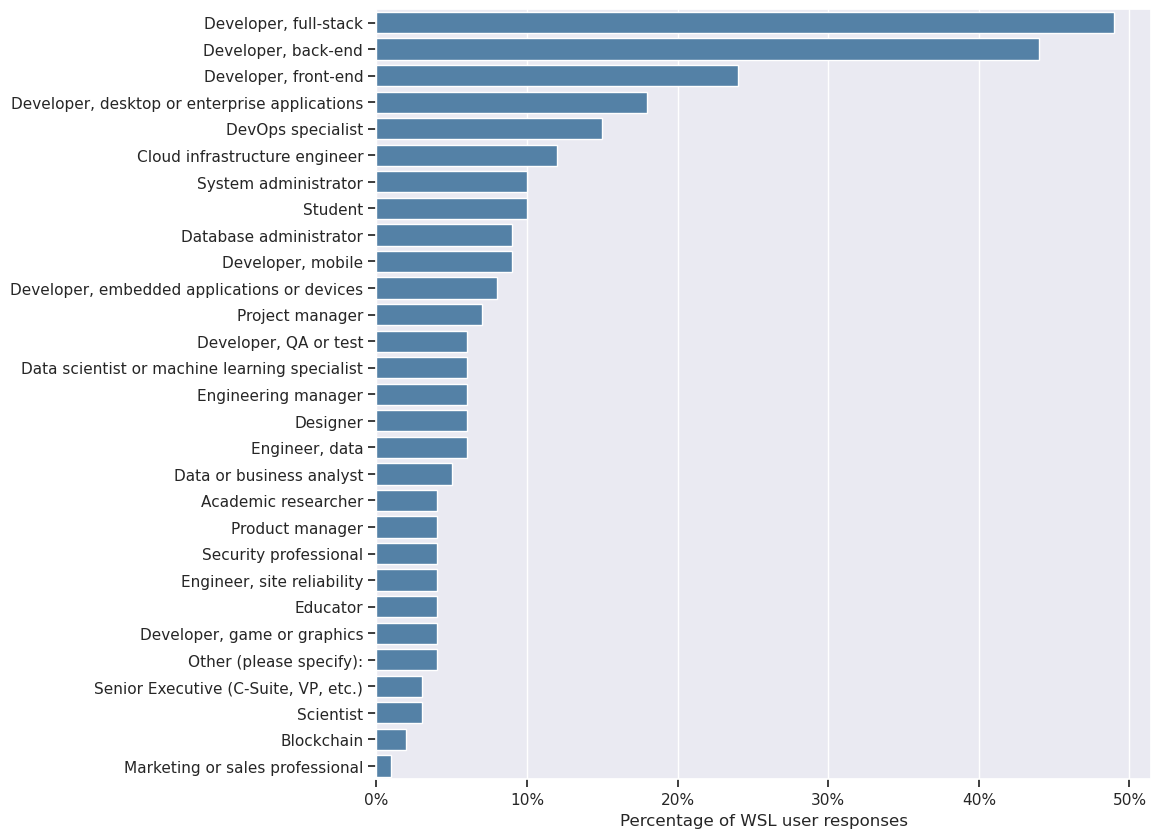

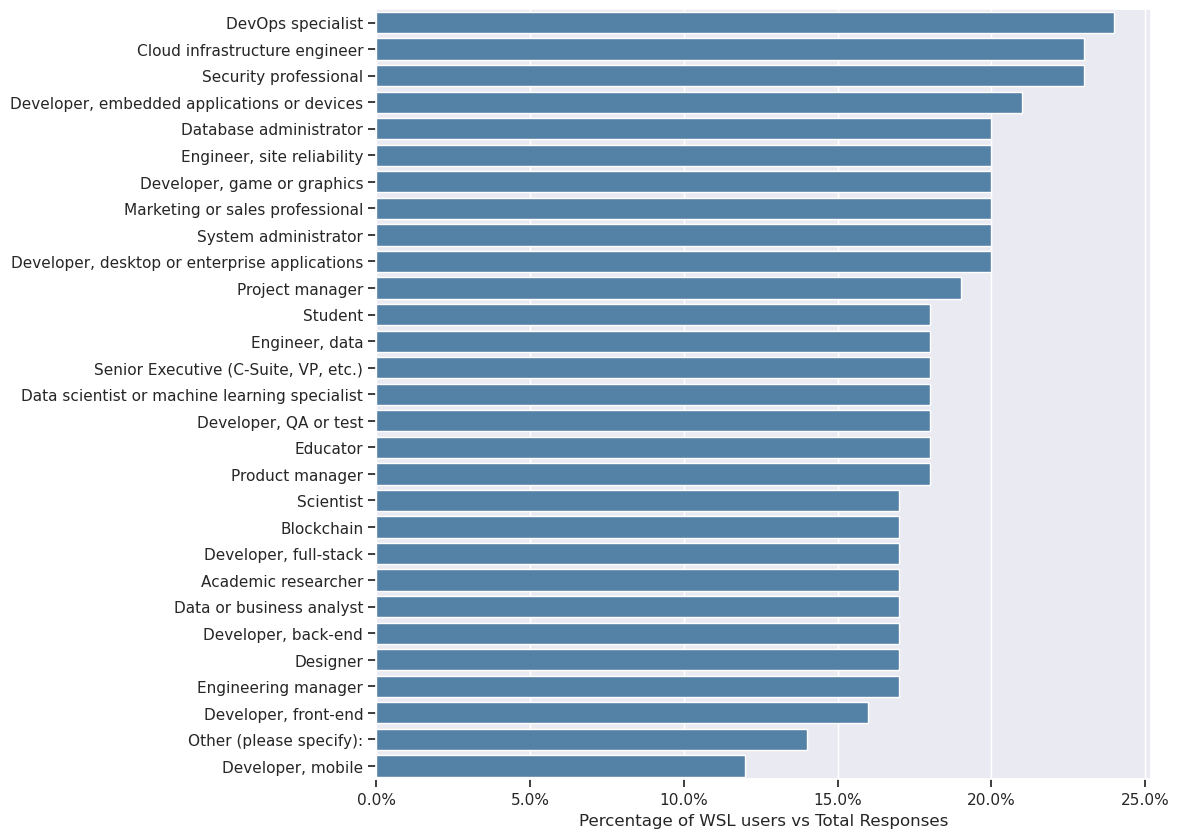

In [19]:
devsum= wslcomparision('DevType')
wslanswersbarpolot('DevType',devsum)
wslcomparisionbarplot('DevType', devsum)

## Preferred Tools / Tech of WSL Users

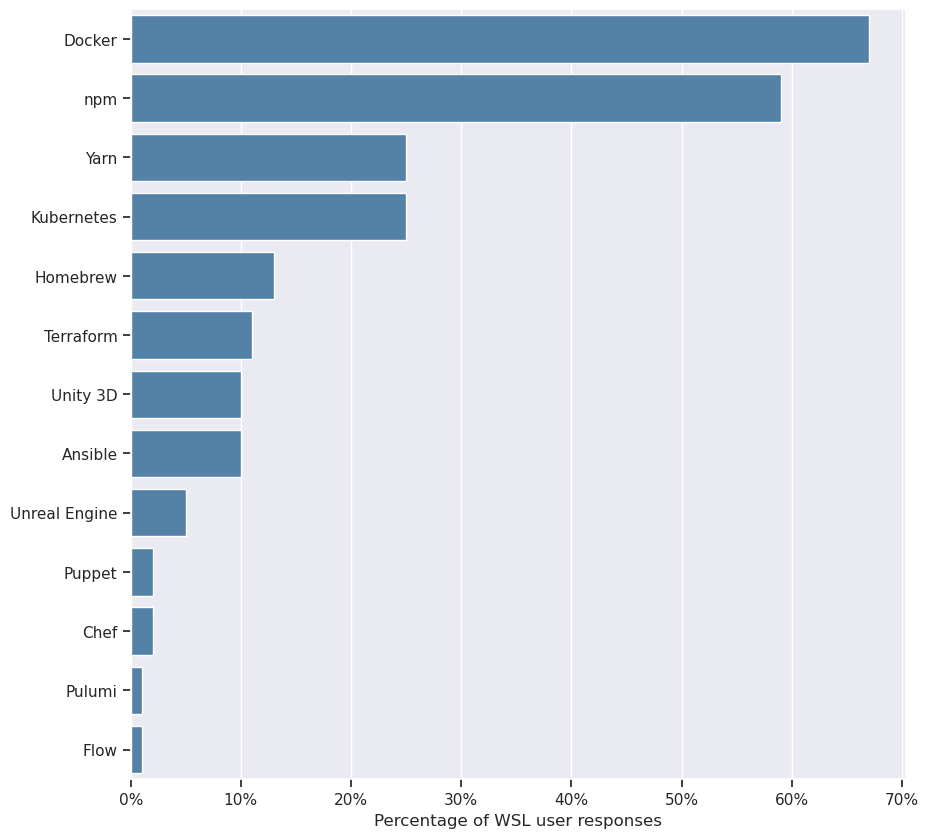

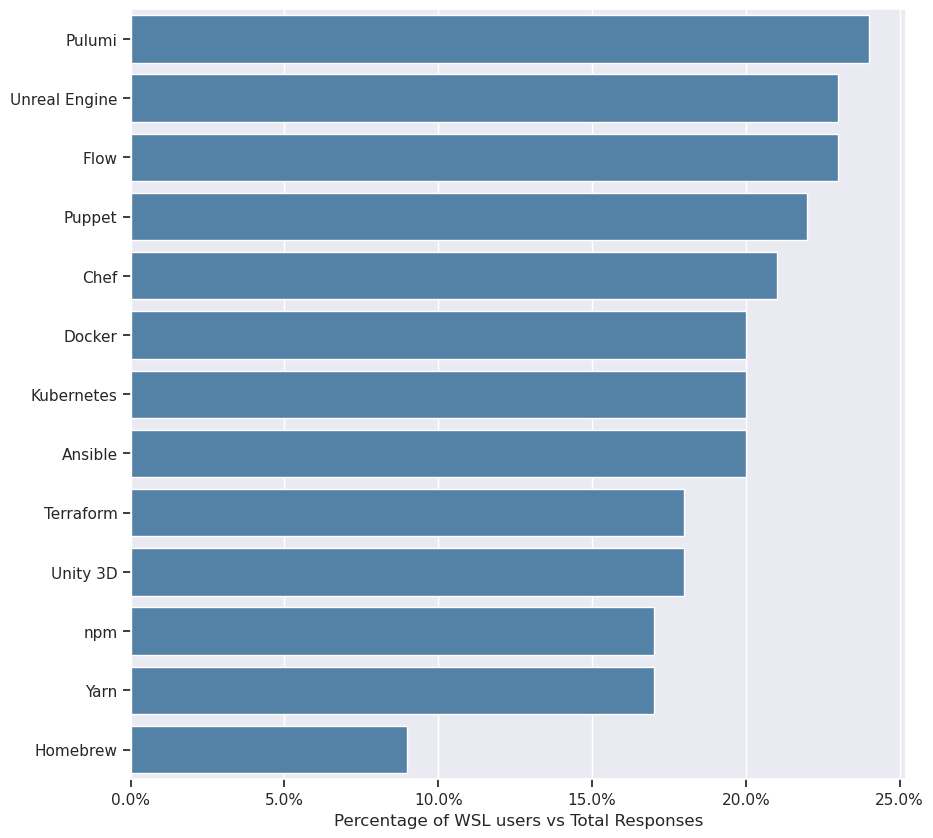

In [20]:
techsum= wslcomparision('ToolsTechHaveWorkedWith')
wslanswersbarpolot('ToolsTechHaveWorkedWith',techsum)
wslcomparisionbarplot('ToolsTechHaveWorkedWith', techsum)

In [21]:
def coloutput(colname):
    df= wslcomparision(colname)
    wslanswersbarpolot(colname,df)
    wslcomparisionbarplot(colname,df)

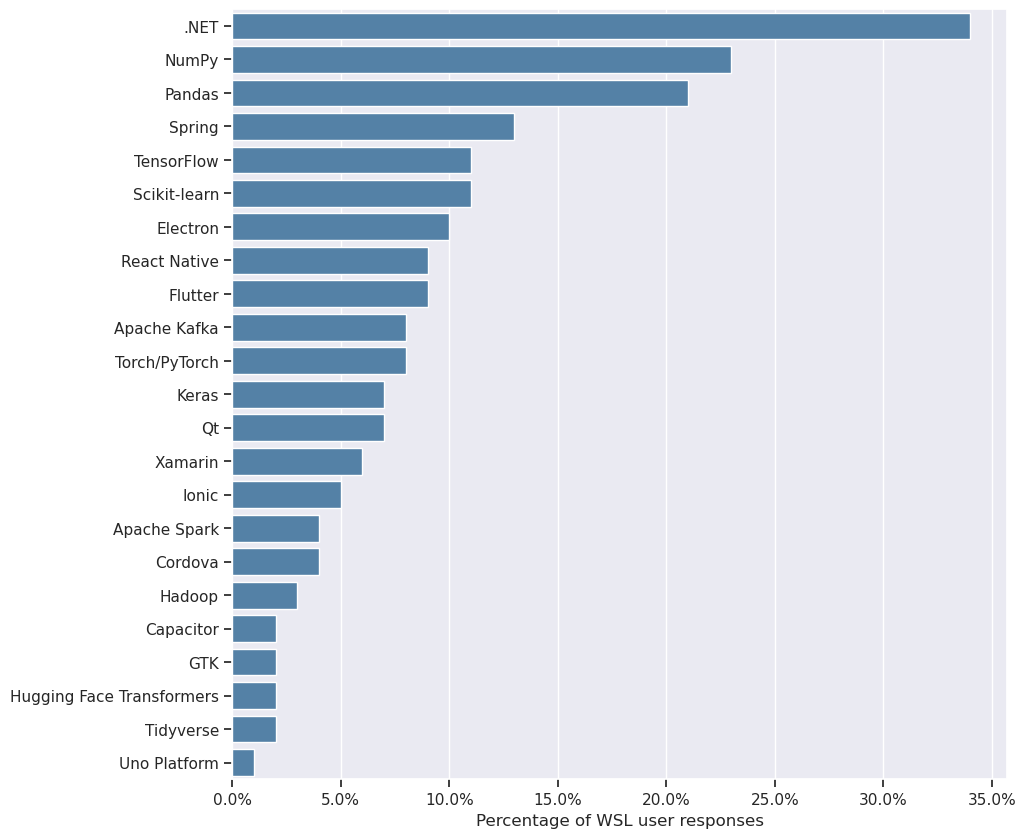

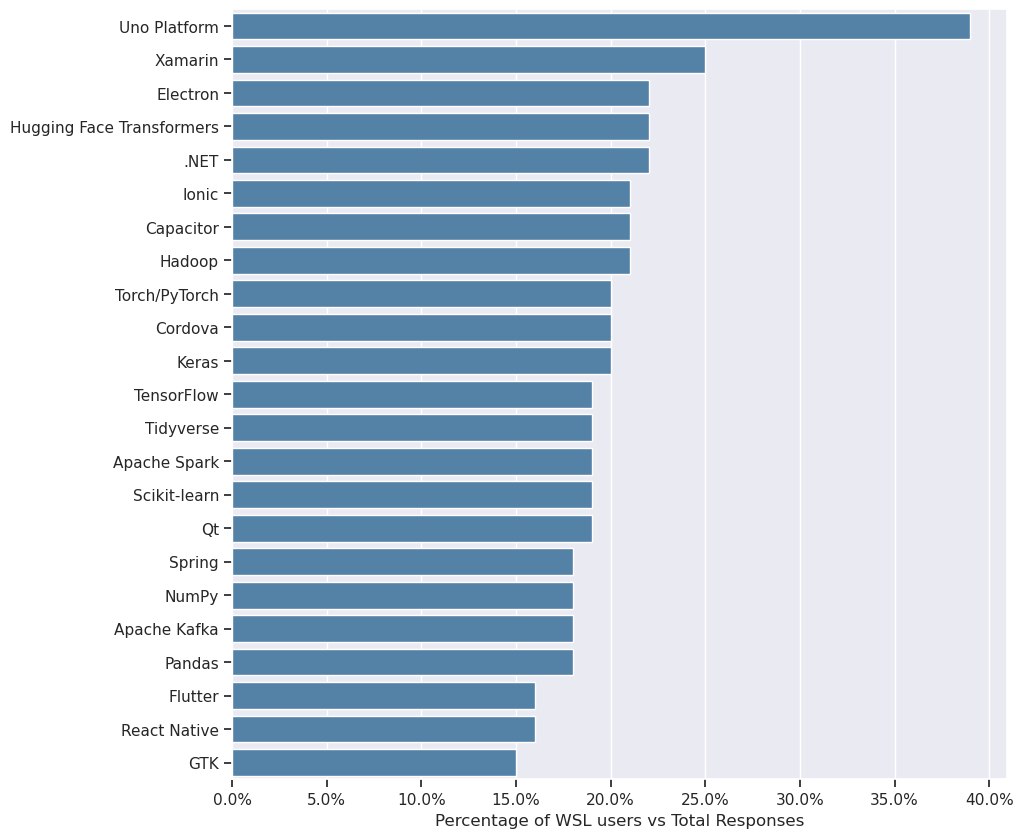

In [23]:
coloutput('MiscTechHaveWorkedWith')